# Support Vector Machines

## But first KNNs recap:

### Discuss with your partner:
- Parametric or non-parametric? Why? What does it mean?
- Eager or lazy? Why? What does it mean?
- Probabilistic or direct? Why? What does it mean?
- Does it require scaling? Why? What does it mean?

# Support Vector Machines

[front of class demo!!!]

In these scenarios, can you find a line or plane that will divide the data?

<img src='images/SVM09.png' width=900/>

## Expected result from demo:
<img src='https://media.giphy.com/media/xT0xeJpnrWC4XWblEk/giphy.gif' width=800/>

## Agenda Today
- SVM for classification 
    -  Maximal Margin Classifier
    -  Soft Margin
    -  The Kernel trick
    -  Example

## 1. Support Vector Classifier

<img src='https://miro.medium.com/max/1450/0*Ojchw_Exefs4qiok.' width=800/>

SVM approach the classification problem in a direct way - __we try and find a plane that separates the classes in the feature space__

If we cannot, we do one of the two things: <br>
- We __soften__ what we mean by "separates" ;
- We __enlarge__ the feature space so that the separation is possible.

__Terminological notes__:
- Support vector machines are sometimes used as a general method that incorporate maximal margin classifier, support vector classifiers etc. However, strictly by definition, support vector machine is a support vector classifier utilized with non-linear kernel. 

"When the support vector classifier is combined with a non-linear kernel [...], the resulting classifier is known as a support vector machine." -- P366, ISLR

#### 1.1 Hyperplane
- In _p_ dimensional space, the hyperplane is the affine subspace defined as p-1. Mathematically, it is defined as:<br>

<center>β0 +β1X1 +β2X2 +...+βpXp = 0</center>

In this case, the vector β = (β1, β2, .., βn) is the normal vector to the hyperplane. <br>
Such that the points lie on one side is greater than 0, and the other side is less than 0. <br>

<img src='images/SVM10.png' width=800/>

Another demonstration or example of hyperplane in a two dimensional space:
<img src='images/SVM01.png' width=500/>

However, the problem with this approach is that we can come up with infinite number of such hyperplanes as we can tilt the line back and forth and it would still serve the same purpose. <br>

__Therefore, we are using the hyperplane such that it would be the farthest from training observations from either side__. The intuition behind it is that if we have chosen a hyperplane that is far from the training observations, it would be far for the testing observations as well. <br>

#### 1.2 Maximal Margin Classifier
SVM tackles the problem of classification directly, in the sense that it does not compute a probabilistic model. Instead, it constructs a hyperplane to directly separate the classes. For example: <br>
<img src='images/SVM02.png' width=800/>

## What problem can you see with this definition?

However, the problem with this approach is that we can come up with infinite number of such hyperplanes as we can tilt the line back and forth and it would still serve the same purpose. <br>

__Therefore, we are using the hyperplane such that it would be the farthest from training observations from either side__. The intuition behind it is that if we have chosen a hyperplane that is far from the training observations, it would be far for the testing observations as well. <br>

The distance between the training observations and the hyperplane is called the _margin_, and the classifier aims to find the 
<img src='images/SVM03.png' width=500/>

<img src='https://i0.wp.com/analyticsrusers.blog/wp-content/uploads/2018/07/SVM-new1.gif?resize=307%2C195&ssl=1' width=500/>

#### 1.3 Constructing and optimizing the maximal margin classifier
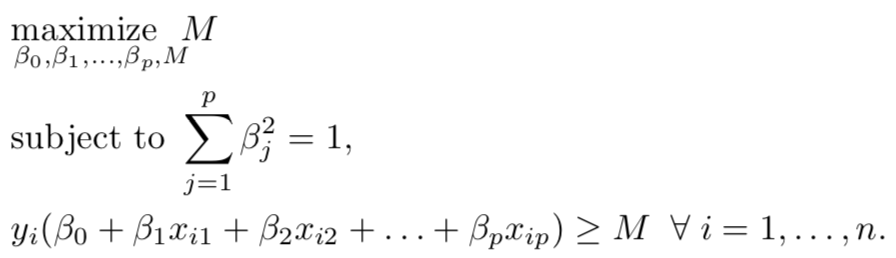

_computation of the above optimization problem can be found of chapter 10 of Elements of Statistical Learning, page 420_

In other words, we want to find parameters values β's such that all the points are at least M distance from the hyperplane and the value of M is maximized. 

## What type of learner are SVMs?
### Discuss with your partner:
- Parametric or non-parametric? Why? What does it mean?
- Eager or lazy? Why? What does it mean?
- Probabilistic or direct? Why? What does it mean?
- Does it require scaling? Why? What does it mean?

## What would happen if we change the classification of one of one of the support vectors?

## 2. Soft Margin Classifier
Even though the maximal margin classifier sounds like an intuitive idea and not too difficult to optimize for, it might not be desirable under two circumstances:

1. It will be sensitive to individual training observations
2. The algorithm will not converge if the training observations cannot be linearly separated.

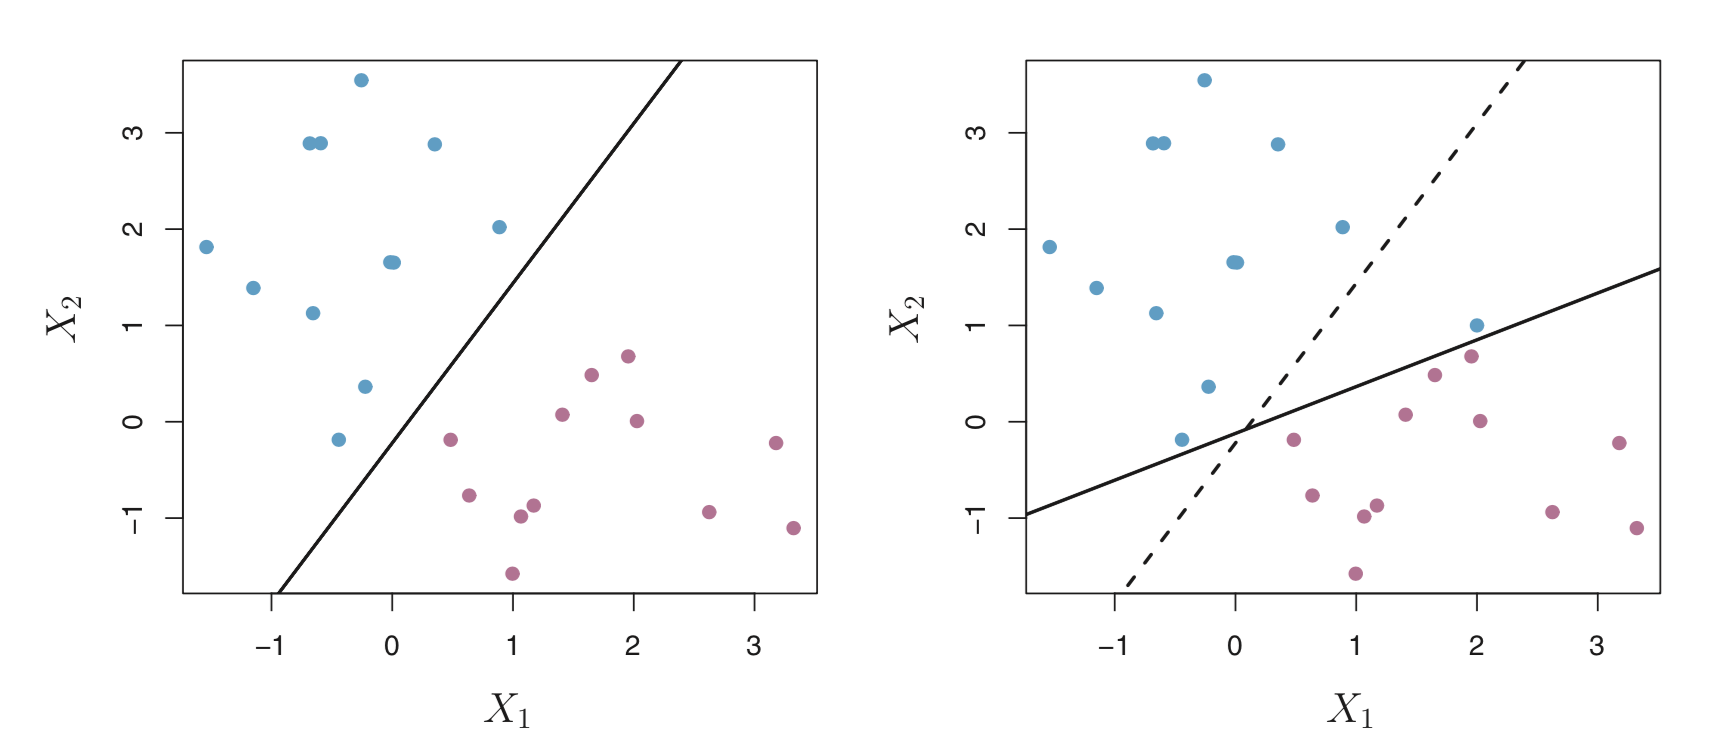

### What happens if we cannot come up with a hyperplane that perfectly separates the training observations?

## The soft margin classifier
We loosen up our definition of the margin.
<img src='images/SVM04.png' width=500/>

__Rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even on the incorrect side of the hyperplane.__
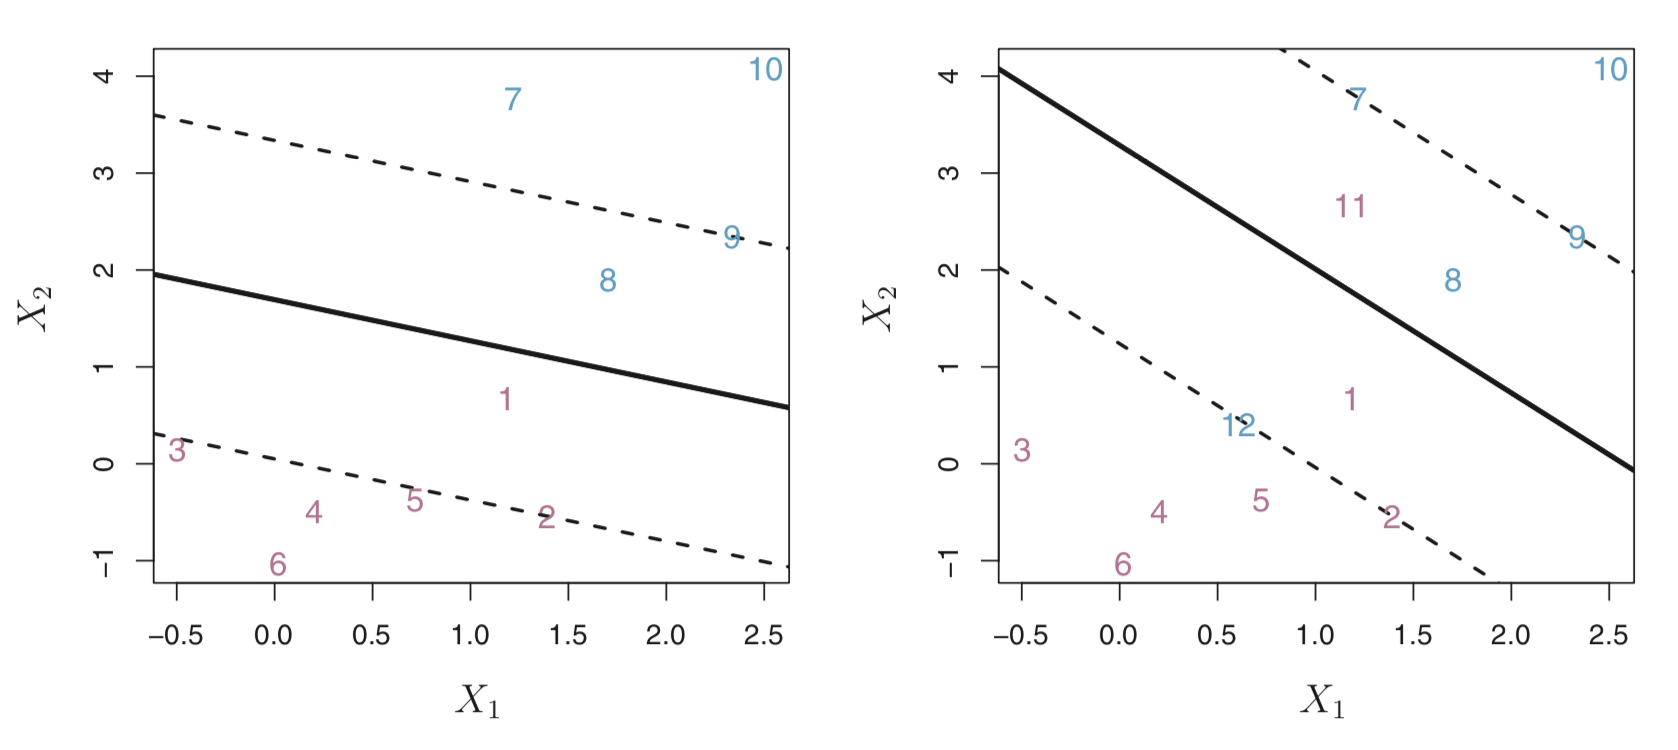

## Mathemathically

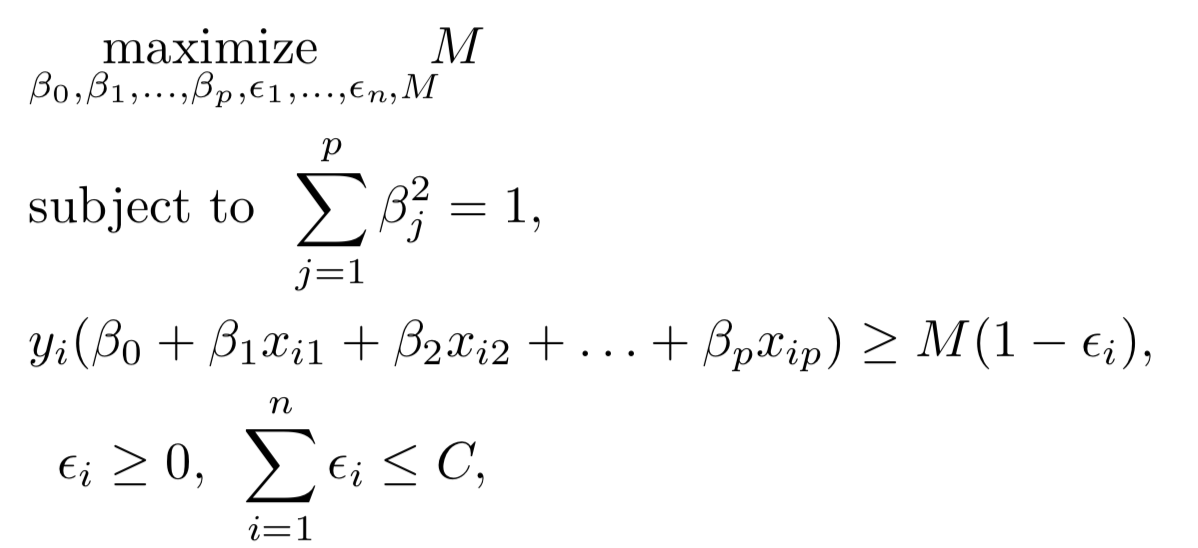
 
The hyperparameter ε is known as the **slack variables**<br>
They dictate how many training observations we **allow to violate the rule** of margins or even the hyperplane.<br>
The amount of slack is **bounded by C** accordingly.<br>

The parameter εi tells us where the ith training observation is located. 
- If εi = 0, then we say the ith training observation is on the correct side of the margin;
- If εi > 0, then we say it has violated the margin
- If εi > 1, then it is on the wrong side of the hyperplane

The value C is the sum of ε across all i training observations.<br>


The parameter C controls the bias-variance tradeoff of the statistical technique.<br>
A **high value of C** means we are **more tolerant** of the violation. It might give us a model that has high bias but low variance. **Less likely to overfit**<br>
A **low value of C** indicates **low tolerance** of the violation, potentially giving us more variance but less bias. **More likely to overfit**. 

__How do we determine the ideal value of C?__

<img src='images/SVM05.png' width=600/>

__Note!__<br>
In scikit-learn implementation, c is defined as the inverse.<br>
A **higher C** is a smaller penalty and **less likely to overfit**<br>
A **lower C** is a higher penalty and **more likely to overfit**

__Note!__<br>
Only the vectors on the margins are used for classification.<br>
They are called the __"Support Vectors"__

## How does the Soft Margin solve the overfitting risk?

## 3. Support Vector Machine ("The Kernel Trick")
Sometimes we have training data that are not able to be separated even with softened margin
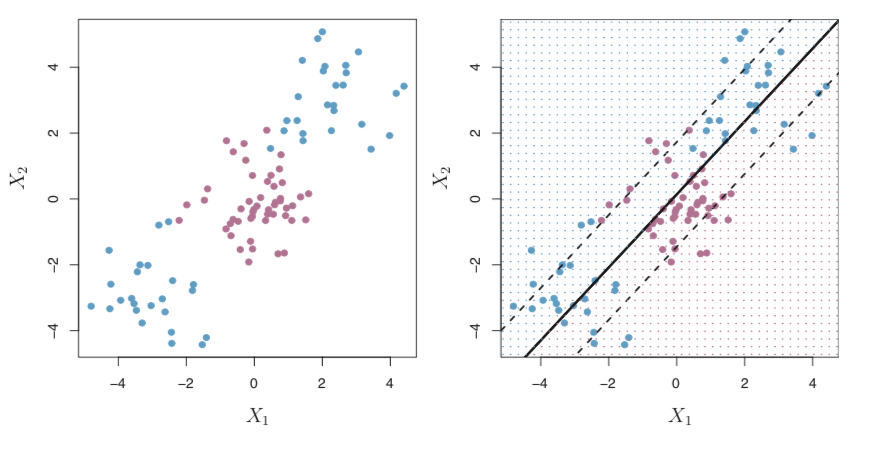

## How do we solve this type of problem?

The intuition to find the optimal fit is called feature space expansion:
- First, we __enlarge__ the feature space through the use of kernel
- Fit a support vector classifier in the enlarged space 
- This results in nonlinear decision boundaries in the original space 

<img src='images/SVM06.png' width=600/>

<img src='images/SVM07.png' width=600/>

#### 3.3 Different types of Kernels: Radial vs Polynomial

<img src='images/SVM08.png' width=600/>

## How does the Kernel Trick solve non-linear classification problems?

# 4. Implementation & Performance comparison

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  

Download data from [this site](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [7]:
bankdata = pd.read_csv('data_banknote_authentication.csv', header = None)
bankdata.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
# our data doesn't have header, so we will manually add that on 
headers = ["Variance","Skewness", "Curtosis","Entropy","Class"]
bankdata.columns = headers

In [9]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [11]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[142   2]
 [  2 129]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       144
          1       0.98      0.98      0.98       131

avg / total       0.99      0.99      0.99       275

The accuracy score is 0.9854545454545455


# Conclusions
- SVM is very effective
- However, it is not highly interpretable
- Optimization is hard to understand 
- Performs really well on high dimensional dataset with low amount of observations



## Comparison

How about we compare this method to:
- Logistic Regression
- K Nearest Neighbor

Half of the class work on comparing it to Logistic, half to KNNs